In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sql
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [31]:
df_desmatamento = pd.read_csv('backend/data/desmatamento_ucs.csv', sep=";", encoding = 'latin-1')
df_queimadas = pd.read_csv('backend/data/areas_queimadas_uc.csv', sep=";", encoding = 'latin-1')
df_metricas = pd.read_csv('backend/data/metricas_acoes_ucs_tratado.csv', sep=";", encoding = 'latin-1')
df_metereologicos = pd.read_csv('backend/data/dados_metereologicos.csv', sep=",", encoding = 'utf-8')

In [32]:
# df_metricas.merge(df_desmatamento, how="left", left_on="cnuc", right_on="codigo_da_uc")["2008"].count()


In [33]:
df_compilado = df_metricas.merge(df_desmatamento, left_on="cnuc", right_on="codigo_da_uc").merge(df_queimadas, left_on="cnuc", right_on="codigo_cnuc")
df_compilado.head(3)

,nome_da_uc_x,nota_pessoal_mean,nota_pessoal_std,nota_equipamento_mean,nota_equipamento_std,nota_capacidade_mean,nota_capacidade_std,nota_recurso_mean,nota_recurso_std,nota_apoio_mean,...,area_estimada_da_uc_(ha),bioma,area_queimada_em_2019,area_queimada_em_2018,area_queimada_em_2017,area_queimada_em_2016,area_queimada_em_2015,area_queimada_em_2014,area_queimada_em_2013,area_queimada_em_2012
0,AREA DE PROTECAO AMBIENTAL CARSTE DA LAGOA SANTA,0.6000,0.210819,0.825000,0.205818,0.975000,0.079057,0.700000,0.307318,0.175000,...,39957,CERRADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AREA DE PROTECAO AMBIENTAL CAVERNAS DO PERUACU,0.2875,0.091587,0.637500,0.189789,0.675000,0.200329,0.312500,0.267481,0.375000,...,143356,CERRADO,NaN,NaN,260.7,NaN,NaN,NaN,NaN,NaN
2,AREA DE PROTECAO AMBIENTAL DA BACIA DO RIO DES...,0.3125,0.155395,0.708333,0.097312,0.708333,0.144338,0.479167,0.270906,0.541667,...,41784,CERRADO,NaN,NaN,1585.4,NaN,NaN,NaN,NaN,NaN


In [34]:
df_compilado.columns

Index(['nome_da_uc_x', 'nota_pessoal_mean', 'nota_pessoal_std',
       'nota_equipamento_mean', 'nota_equipamento_std', 'nota_capacidade_mean',
       'nota_capacidade_std', 'nota_recurso_mean', 'nota_recurso_std',
       'nota_apoio_mean', 'nota_apoio_std', 'cnuc', 'bioma_x',
       'calculo_efetividade_mean', 'calculo_efetividade_std', 'Unnamed: 0_x',
       'codigo_da_uc', 'nome_da_uc_y', 'grupo', 'criacao', 'area_geo',
       'bioma_y', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000', 'acum 1997', 'Unnamed: 0_y',
       'codigo_cnuc', 'nome_da_uc', 'categoria_da_uc:_sigla_federal',
       'categoria_da_uc:_nomenclatura_nacional', 'grupo_de_protecao',
       'ano_de_criacao', 'coordenacao_regional_do_icmbio',
       'area_estimada_da_uc_(ha)', 'bioma', 'area_queimada_em_2019',
       'area_queimada_em_2018', 'area_queimada_em_2017',
       'area_queima

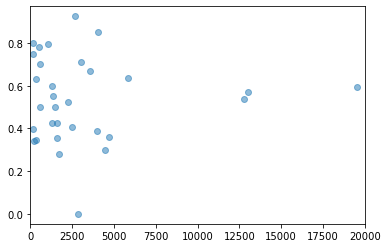

In [35]:
plt.scatter(df_compilado["area_queimada_em_2016"], df_compilado["nota_pessoal_mean"], alpha=0.5)
plt.xlim([0, 20000])
plt.show()

In [36]:
scaler = MinMaxScaler()

indicador_de_necessidade = np.array((df_compilado["2020"])/(df_compilado["nota_pessoal_mean"] + 1))
indicador_de_necessidade_min_max = scaler.fit_transform(indicador_de_necessidade.reshape(-1,1))

In [37]:
indicador_de_necessidade_min_max

array([[8.00279155e-04],
       [2.67150285e-03],
       [1.69025818e-03],
       [8.10587090e-03],
       [8.17737668e-02],
       [5.24035681e-02],
       [2.52027366e-03],
       [4.80135565e-02],
       [5.97134020e-01],
       [           nan],
       [4.38038820e-02],
       [6.50569708e-03],
       [9.22258626e-03],
       [4.99704059e-02],
       [           nan],
       [           nan],
       [           nan],
       [           nan],
       [6.21639251e-03],
       [5.02477235e-03],
       [1.52516640e-01],
       [           nan],
       [8.33463418e-04],
       [           nan],
       [           nan],
       [           nan],
       [8.42337003e-05],
       [           nan],
       [1.50794757e-03],
       [1.55474370e-03],
       [4.76644065e-01],
       [           nan],
       [4.51011855e-03],
       [1.07386802e-01],
       [           nan],
       [           nan],
       [1.25072130e-02],
       [9.95814189e-03],
       [           nan],
       [1.14739542e-02],


In [38]:
falso_positivo_min_max[~np.isnan(falso_positivo_min_max)]

array([8.00279155e-04, 2.67150285e-03, 1.69025818e-03, 8.10587090e-03,
       8.17737668e-02, 5.24035681e-02, 2.52027366e-03, 4.80135565e-02,
       5.97134020e-01, 4.38038820e-02, 6.50569708e-03, 9.22258626e-03,
       4.99704059e-02, 6.21639251e-03, 5.02477235e-03, 1.52516640e-01,
       8.33463418e-04, 8.42337003e-05, 1.50794757e-03, 1.55474370e-03,
       4.76644065e-01, 4.51011855e-03, 1.07386802e-01, 1.25072130e-02,
       9.95814189e-03, 1.14739542e-02, 9.01151769e-03, 1.00990659e-01,
       9.08275572e-03, 5.72383626e-04, 2.75750202e-03, 1.35012533e-03,
       7.44075591e-03, 2.20673869e-02, 6.40841082e-03, 4.37188042e-02,
       4.13671771e-04, 1.40155177e-02, 3.74561101e-02, 1.45088431e-02,
       7.33366793e-02, 4.06021365e-03, 9.81724213e-03, 2.38648464e-02,
       4.21665377e-03, 1.00000000e+00, 7.16393683e-03, 1.69049038e-02,
       5.35880308e-03, 1.52638635e-02, 1.88433130e-03, 1.60639287e-02,
       4.51325756e-02, 7.19426190e-03, 1.05560957e-02, 1.78358191e-04,
      

In [39]:
df_compilado['indicador_de_necessidade_min_max'] = indicador_de_necessidade_min_max

In [43]:
df_compilado['indicador_de_necessidade_min_max'] = df_compilado['indicador_de_necessidade_min_max'].fillna(-1)
df_compilado['indicador_de_necessidade_min_max']

0      0.000800
1      0.002672
2      0.001690
3      0.008106
4      0.081774
         ...   
155    0.020664
156   -1.000000
157    0.003892
158    0.006005
159    0.080791
Name: indicador_de_necessidade_min_max, Length: 160, dtype: float64

In [45]:
df_indicadores = df_compilado.sort_values(by='indicador_de_necessidade_min_max', ascending=False)[['codigo_da_uc','nome_da_uc','indicador_de_necessidade_min_max']].reset_index(drop=True)

In [62]:
df_indicadores.to_csv('./backend/data/indicadores_min_max_ucs.csv', sep=';', index=False)

In [20]:
# engine = sql.create_engine('sqlite:///backend/data/database.db', echo=False)

In [21]:
# query = f"""
#     SELECT 
#         nome_da_uc, nota_pessoal_mean
#     FROM metricas_acoes_ucs_tratado 
# """

In [22]:
# ucs = []
# nota_pessoal = []

# with engine.connect() as connection:
#     result = connection.execute(query)
#     print(result)
#     table_keys = result.keys()
#     for row in result:
#         ucs.append(row[0]) 
#         nota_pessoal.append(row[1])


In [23]:
# df = sql.create_engine('sqlite:///backend/data/database.db', echo=False)